In [2]:
# import requirements
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, linregress

NOVEL_DIRECTORY = './data/novels/'

In [3]:
# code to process event distribution
def compute_event_distribution(filename: str) -> dict[str, float]:
    """Computes the events/tokens ration and the tokens/events ratio for novel"""
    
    # count amount of tokens in the text
    with open(NOVEL_DIRECTORY + filename + '.tok', 'r', encoding='UTF-8') as inp:
        token_count = sum([len(line.split(' ')) for line in inp.readlines()])


    # count amount of events in the text
    event_count = {'realis': 0, 'non-realis': 0}
    with open(NOVEL_DIRECTORY + filename + '.predictions.pickle', 'rb') as inp:
        events: list[list[dict]] = pickle.load(inp)

    for line in events:
        for event in line:
            match event['entity']: # event type
                case 'realis':
                    event_count['realis'] += 1
                case 'nonrealis':
                    event_count['non-realis'] += 1
                    
    events_total = event_count['realis'] + event_count['non-realis']
    
    return {
        'tokens': token_count,
        'realis events': event_count['realis'],
        'non-realis events': event_count['non-realis'],
        'all_events': events_total,
        'realis/non-realis ratio': event_count['realis']/event_count['non-realis'],
        'realis/tokens ratio': event_count['realis']/token_count,
        'non-realis/tokens ratio': event_count['non-realis']/token_count,
        'all_events/tokens ratio': events_total/token_count,
        'tokens/realis distance': token_count/event_count['realis'],
        'tokens/non-realis distance': token_count/event_count['non-realis'],
        'tokens/all_events distance': token_count/events_total,
    }


def compute_events_distribution(filenames: list[str]) -> pd.DataFrame:
    """Of all novels in filenames, compute events/tokens and tokens/events"""

    event_distribution = {}

    for filename in filenames:
        event_distribution[filename] = compute_event_distribution(filename)

    return pd.DataFrame.from_dict(event_distribution, orient='index')
    

## LOAD DATA

In [4]:
# create scores for canonical novels
with open(NOVEL_DIRECTORY + '_canonical_novels_small.txt', 'r', encoding='UTF-8') as inp:
    filenames = [filename.rstrip() for filename in inp.readlines()]

canonical_df = compute_events_distribution(filenames)

# canonical_df.mean(axis=0)

canonical_df

,tokens,realis events,non-realis events,all_events,realis/non-realis ratio,realis/tokens ratio,non-realis/tokens ratio,all_events/tokens ratio,tokens/realis distance,tokens/non-realis distance,tokens/all_events distance
vest002vuur01_01,288601,32154,10226,42380,3.144338,0.111413,0.035433,0.146846,8.975586,28.222277,6.809840
looy001jaap01_01,68459,3490,640,4130,5.453125,0.050979,0.009349,0.060328,19.615759,106.967187,16.576029
szek002koel01_01,58326,7717,1815,9532,4.251791,0.132308,0.031118,0.163426,7.558118,32.135537,6.118968
boud007kind01_01,48404,984,354,1338,2.779661,0.020329,0.007313,0.027642,49.191057,136.734463,36.176383
last001part01_01,85541,8941,2477,11418,3.609608,0.104523,0.028957,0.133480,9.567274,34.534114,7.491767
such003stil01_01,135348,13157,5280,18437,2.491856,0.097209,0.039011,0.136219,10.287148,25.634091,7.341108
bord001rood01_01,55670,6673,1897,8570,3.517659,0.119867,0.034076,0.153943,8.342575,29.346336,6.495916
eede003joha02_01,69863,6477,2328,8805,2.782216,0.092710,0.033322,0.126032,10.786321,30.009880,7.934469
waze001vlaa01_01,77057,8080,2552,10632,3.166144,0.104857,0.033118,0.137976,9.536757,30.194749,7.247649
coup002meta01_01,95852,10323,3133,13456,3.294925,0.107697,0.032686,0.140383,9.285285,30.594319,7.123365


In [5]:
# create scores for non-canonical novels
with open(NOVEL_DIRECTORY + '_non_canonical_novels_small.txt', 'r', encoding='UTF-8') as inp:
    filenames = [filename.rstrip() for filename in inp.readlines()]

non_canonical_df = compute_events_distribution(filenames)

# non_canonical_df.mean(axis=0)

non_canonical_df

,tokens,realis events,non-realis events,all_events,realis/non-realis ratio,realis/tokens ratio,non-realis/tokens ratio,all_events/tokens ratio,tokens/realis distance,tokens/non-realis distance,tokens/all_events distance
penn006held04_01,67424,8178,2006,10184,4.076770,0.121292,0.029752,0.151044,8.244559,33.611167,6.620581
rikk001codj01_01,117272,12904,4766,17670,2.707512,0.110035,0.040641,0.150675,9.088035,24.605959,6.636786
gram001fami01_01,90341,9480,3058,12538,3.100065,0.104936,0.033850,0.138785,9.529641,29.542511,7.205376
kepp002onge01_01,123155,15813,5138,20951,3.077657,0.128399,0.041720,0.170119,7.788212,23.969443,5.878240
albe002koni03_01,60050,6493,3257,9750,1.993552,0.108127,0.054238,0.162365,9.248421,18.437212,6.158974
woud008verw01_01,54954,6500,2324,8824,2.796902,0.118281,0.042290,0.160571,8.454462,23.646299,6.227788
midd005scha01_01,56541,6398,2197,8595,2.912153,0.113157,0.038857,0.152014,8.837293,25.735548,6.578360
homo004hofn01_01,51090,5598,1721,7319,3.252760,0.109571,0.033686,0.143257,9.126474,29.686229,6.980462
lamb015wing01_01,62722,6721,1984,8705,3.387601,0.107155,0.031632,0.138787,9.332242,31.613911,7.205284
relh001mana01_01,69312,6336,2410,8746,2.629046,0.091413,0.034770,0.126183,10.939394,28.760166,7.924994


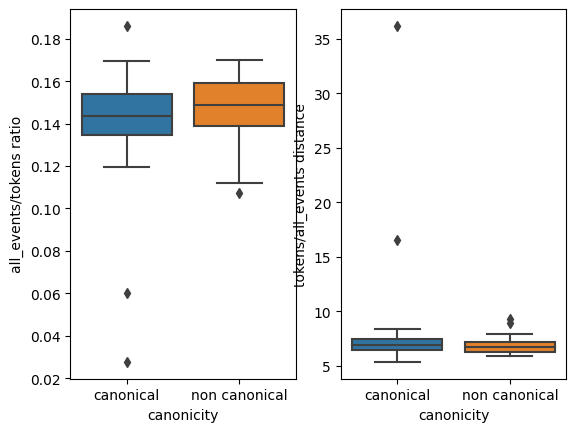

In [6]:
# print boxplots of event ratio/distance in canonical/non-canonical novels
combined_df = pd.concat([canonical_df.assign(canonicity='canonical'), non_canonical_df.assign(canonicity='non canonical')])

fig, ax = plt.subplots(1,2)

sns.boxplot(x='canonicity', y='all_events/tokens ratio', data=combined_df, ax=ax[0])  
sns.boxplot(x='canonicity', y='tokens/all_events distance', data=combined_df, ax=ax[1])  

plt.show()  

## RATIO & DISTANCE CORRELATION

In [15]:
# compute correlation
ALPHA = 0.05
correlation_df = pd.concat([canonical_df.assign(canonicity=1), non_canonical_df.assign(canonicity=0)]).iloc[:,4:]

for column in correlation_df.iloc[:,1:-1]:
      correlation, p_value = pointbiserialr(correlation_df[column], correlation_df['canonicity'])
      print(f'{column + " correlation:":<39} {"-" if correlation < 0 else " "}'
            f'{abs(correlation):.4f} | {column + " p-value:":<35} {p_value:.4f}', end='')
      print(' -> significant' if p_value <= ALPHA/2 else '')

realis/tokens ratio correlation:        -0.0108 | realis/tokens ratio p-value:        0.9359
non-realis/tokens ratio correlation:    -0.3128 | non-realis/tokens ratio p-value:    0.0168 -> significant
all_events/tokens ratio correlation:    -0.1372 | all_events/tokens ratio p-value:    0.3044
tokens/realis distance correlation:      0.1237 | tokens/realis distance p-value:     0.3550
tokens/non-realis distance correlation:  0.2669 | tokens/non-realis distance p-value: 0.0428
tokens/all_events distance correlation:  0.1610 | tokens/all_events distance p-value: 0.2274


## RATIO & DISTANCE REGRESSION

In [8]:
# create df to compute and plot regression analysis
metadata_df = pd.read_csv('./data/novels/_metadata.tsv', sep='\t')
regression_df = pd.concat([canonical_df.assign(canonicity='canonical'), non_canonical_df.assign(canonicity='non_canonical')])

regression_df = regression_df.reset_index()
regression_df = regression_df.rename(columns={'index': 'DBNLti_id'})
regression_df['DBNLti_id'] = regression_df['DBNLti_id'].str[:-3]

regression_df = regression_df.merge(metadata_df[['DBNLti_id', 'DBNLSecRefsTitle']], on='DBNLti_id', how='left')
regression_df=regression_df.reindex(columns=list(regression_df.columns[:-2]) + ['DBNLSecRefsTitle', 'canonicity'])

regression_df.head()

,DBNLti_id,tokens,realis events,non-realis events,all_events,realis/non-realis ratio,realis/tokens ratio,non-realis/tokens ratio,all_events/tokens ratio,tokens/realis distance,tokens/non-realis distance,tokens/all_events distance,DBNLSecRefsTitle,canonicity
0,vest002vuur01,288601,32154,10226,42380,3.144338,0.111413,0.035433,0.146846,8.975586,28.222277,6.809840,10,canonical
1,looy001jaap01,68459,3490,640,4130,5.453125,0.050979,0.009349,0.060328,19.615759,106.967187,16.576029,10,canonical
2,szek002koel01,58326,7717,1815,9532,4.251791,0.132308,0.031118,0.163426,7.558118,32.135537,6.118968,10,canonical
3,boud007kind01,48404,984,354,1338,2.779661,0.020329,0.007313,0.027642,49.191057,136.734463,36.176383,10,canonical
4,last001part01,85541,8941,2477,11418,3.609608,0.104523,0.028957,0.133480,9.567274,34.534114,7.491767,10,canonical


In [9]:
# compute regression
ALPHA = 0.05

for column in regression_df.iloc[:,6:-2]:
    results = linregress(x=regression_df[column], y=regression_df['DBNLSecRefsTitle'], alternative='two-sided')
    slope, p_value = [results[idx] for idx in [0, 3]]
    print(f'{column + " slope:":<33} {"-" if slope < 0 else " "}'
          f'{abs(slope):<8.4f} | {column + " p-value:":<35} {p_value:.4f}', end='')
    print(' -> significant' if p_value <= ALPHA/2 else '')

realis/tokens ratio slope:         54.3497  | realis/tokens ratio p-value:        0.5094
non-realis/tokens ratio slope:    -194.7550 | non-realis/tokens ratio p-value:    0.2267
all_events/tokens ratio slope:     2.5455   | all_events/tokens ratio p-value:    0.9695
tokens/realis distance slope:     -0.0222   | tokens/realis distance p-value:     0.9396
tokens/non-realis distance slope:  0.0646   | tokens/non-realis distance p-value: 0.4330
tokens/all_events distance slope:  0.0422   | tokens/all_events distance p-value: 0.9153


/mnt/c/Users/bbjov/My Documents/informatiekunde/bachelor_scriptie/event-prediction/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


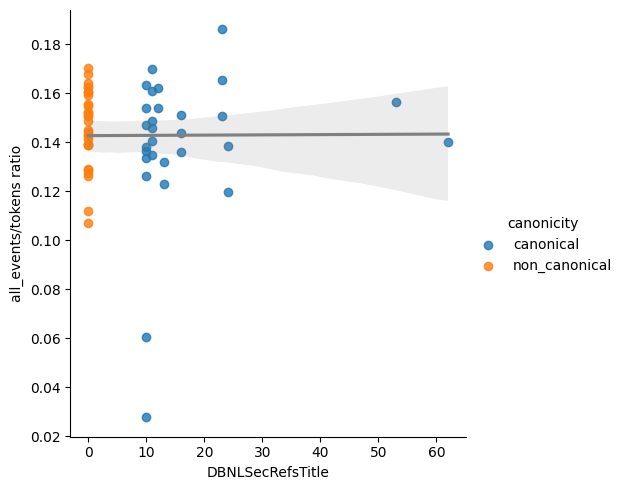

In [10]:
# plot regression for events ratio
g = sns.lmplot(x='DBNLSecRefsTitle', y='all_events/tokens ratio', hue='canonicity', data=regression_df, fit_reg=False)
sns.regplot(x='DBNLSecRefsTitle', y='all_events/tokens ratio', data=regression_df, scatter=False, ax=g.axes[0, 0], line_kws={'color': 'grey'})
plt.show()

/mnt/c/Users/bbjov/My Documents/informatiekunde/bachelor_scriptie/event-prediction/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


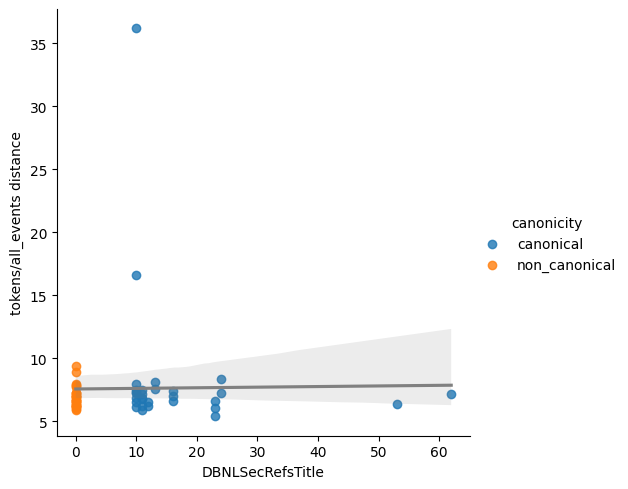

In [11]:
# plot regression for events distance
g = sns.lmplot(x='DBNLSecRefsTitle', y='tokens/all_events distance', hue='canonicity', data=regression_df, fit_reg=False)
sns.regplot(x='DBNLSecRefsTitle', y='tokens/all_events distance', data=regression_df, scatter=False, ax=g.axes[0, 0], line_kws={'color': 'grey'})
plt.show()

## REALIS/NON-REALIS RATIO

In [12]:
# compute realis/non-realis ratio correlation

correlation, p_value = pointbiserialr(correlation_df['realis/non-realis ratio'], correlation_df['canonicity'])
print(f'{"realis/non-realis ratio correlation:":<39} {"-" if correlation < 0 else " "}'
    f'{abs(correlation):.4f} | {"realis/non-realis ratio p-value:":<35} {p_value:.4f}', end='')
print(' -> significant' if p_value <= ALPHA/2 else '')

realis/non-realis ratio correlation:     0.2441 | realis/non-realis ratio p-value:    0.0648


In [13]:
# compute realis/non-realis regression
results = linregress(x=regression_df['realis/non-realis ratio'], y=regression_df['DBNLSecRefsTitle'], alternative='two-sided')
slope, p_value = [results[idx] for idx in [0, 3]]
print(f'{"realis/non-realis ratio slope:":<33} {"-" if slope < 0 else " "}'
        f'{abs(slope):<8.4f} | {"realis/non-realis ratio p-value:":<35} {p_value:.4f}', end='')
print(' -> significant' if p_value <= ALPHA/2 else '')

realis/non-realis ratio slope:     1.5386   | realis/non-realis ratio p-value:    0.1628


/mnt/c/Users/bbjov/My Documents/informatiekunde/bachelor_scriptie/event-prediction/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


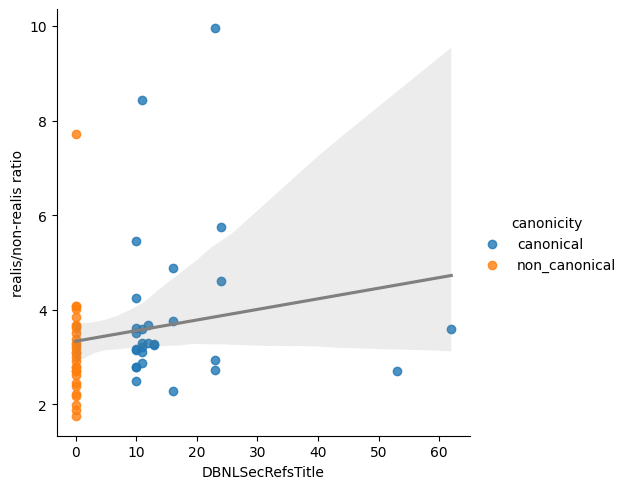

In [14]:
# plot regression graph for realis/non-realis regression
g = sns.lmplot(x='DBNLSecRefsTitle', y='realis/non-realis ratio', hue='canonicity', data=regression_df, fit_reg=False)
sns.regplot(x='DBNLSecRefsTitle', y='realis/non-realis ratio', data=regression_df, scatter=False, ax=g.axes[0, 0], line_kws={'color': 'grey'})
plt.show()